# Dunya Mutluluk İndeksi

Problem tanımı ve amaç: Bu veri seti ilk kez 2012 yılında yayınlanan 155 ülkeyi mutluluk seviyelerine göre sıralayan dünya mutluluk raporlarından oluşmaktadır.

Mutluluk seviyelerini belirlemek için 6 faktör -ekonomik üretim, sosyal destek, yaşam beklentisi, özgürlük, yolsuzluğun olmaması ve cömertlik - göz önüne alınmaktadır. Amaç günümüz dünyasında daha mutlu toplumlar oluşmasına katkı sağlamak için aşağıdaki gibi sorulara cevaplar arayabilmektir.

Hangi ülkeler veya bölgeler genel mutlulukta ve mutluluğa katkıda bulunan altı faktörün her birinde en yüksek sırada yer alıyor?
2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti?
Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı?

In [14]:
# gerekli kütüphaneleri yükleye.
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
# verileri yükle

data= pd.read_csv('2019.csv')
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
kopya_satir = data.duplicated() # kopya varsa true dönecektir...
print(kopya_satir.any())

False


In [7]:
data.shape

(156, 9)

In [6]:
print(data.describe()) # dataset ile ilgili istatiksel bilgiler görüntülenir.

       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%             

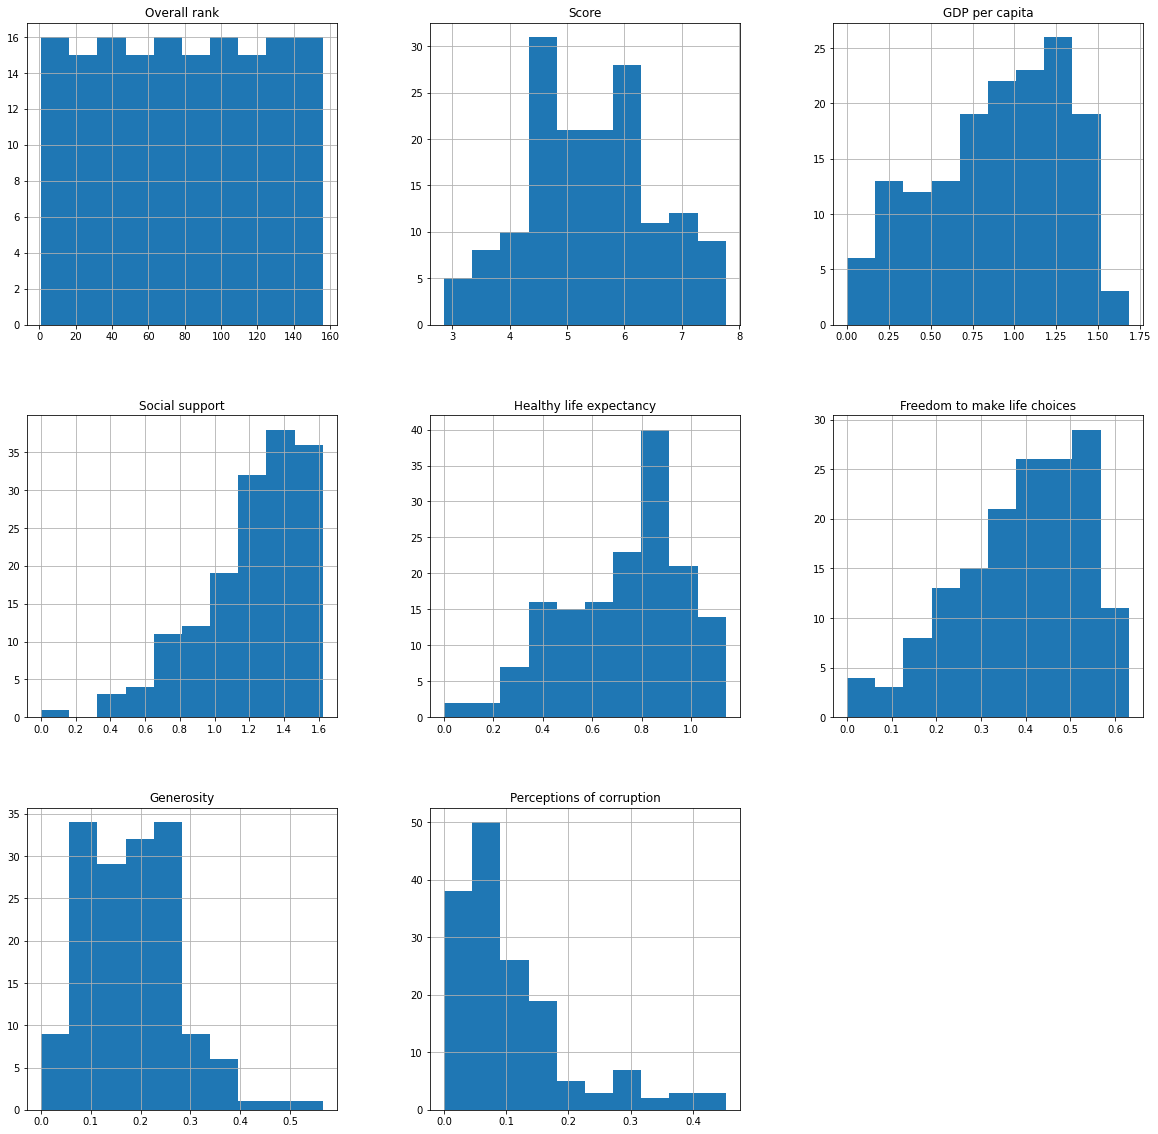

In [76]:
data.hist(figsize=(20,20))
plt.show()

In [10]:
print(data.isnull().sum())

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [57]:
# hangi ülke veya bölge genel mutluluk score dağılımı nedir.
histogram_data= data[['Score','Country or region']]
histogram_data.head()

,Score,Country or region
0,7.769,Finland
1,7.600,Denmark
2,7.554,Norway
3,7.494,Iceland
4,7.488,Netherlands


In [58]:
histogram_data.head()

,Score,Country or region
0,7.769,Finland
1,7.600,Denmark
2,7.554,Norway
3,7.494,Iceland
4,7.488,Netherlands


In [59]:
bar_histogram_data = histogram_data['Score'] > 7

In [60]:
bar_histogram_data = histogram_data[bar_histogram_data]

In [63]:
bar_histogram_data.head(5)

,Score,Country or region
0,7.769,Finland
1,7.600,Denmark
2,7.554,Norway
3,7.494,Iceland
4,7.488,Netherlands


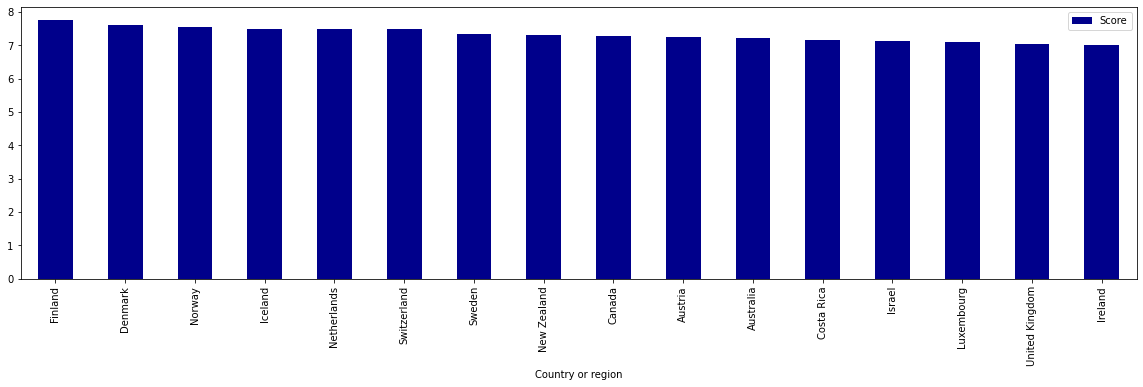

In [61]:
# Finland ülkeler arasında en yüksek mutluluk score elde etmiştir.
bar_histogram_data.plot.bar(x='Country or region', y='Score', figsize=(20,5), color='darkblue');

In [91]:
GDP_histogram_data= data[['Score','GDP per capita']]

GDPpercapita_histogram_data = GDP_histogram_data['Score'] > 6

GDPpercapita_histogram_data = GDP_histogram_data[GDPpercapita_histogram_data]

GDPpercapita_histogram_data = GDPpercapita_histogram_data.sort_values('GDP per capita')

In [92]:
GDPpercapita_histogram_data.head(5)

,Score,GDP per capita
44,6.105,0.694
40,6.174,0.745
34,6.253,0.794
26,6.436,0.800
45,6.100,0.882


<AxesSubplot:xlabel='GDP per capita'>

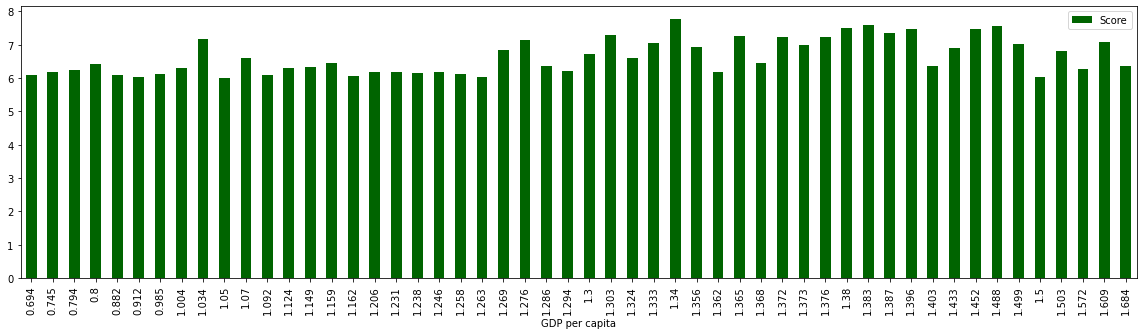

In [93]:
# mutluluk skoru 6 nın üzerinde olan ülkeler: 

#GDP per capitası 1.34 olan ülke yada bölgeler en fazla skor elde etmişlerdir.
# GDP per capitası 1.684 olan ülke yada bölgeler en az skor elde etmişlerdir.
# GDP per capita ya göre mutluluk skorunda belirgin bir eğilim olmadığı anlaşılmaktadır.

GDPpercapita_histogram_data.plot.bar(x='GDP per capita', y='Score', figsize=(20,5), color='darkgreen')

In [95]:
Social_support_data = data.sort_values('Social support')
Social_support_data.tail(5)

# 1.624 Social_support ile Iceland en yuksek puanı almıştır. 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118


In [98]:
H_l_xpectancy_data = data.sort_values('Healthy life expectancy')
H_l_xpectancy_data.tail(5)

# Sağlıklı yaşam destek beklentisi skorunda 1.141 ile Singopore en yuksek skoru elde etmiştir.

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
29,30,Spain,6.354,1.286,1.484,1.062,0.362,0.153,0.079
57,58,Japan,5.886,1.327,1.419,1.088,0.445,0.069,0.140
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453


# 2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti?

In [126]:
data15 = pd.read_csv('2015.csv')
data16 = pd.read_csv('2016.csv')
data17 = pd.read_csv('2017.csv')
data18 = pd.read_csv('2018.csv')
data19 = pd.read_csv('2019.csv')


In [111]:
data16

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [104]:
his_data15 = data15[['Happiness Score','Country']]

his_data15_f = his_data15['Happiness Score'] > 6

his_data15 = his_data15[his_data15_f]

his_data15 = his_data15.sort_values('Happiness Score')

In [105]:
his_data15.head()

,Happiness Score,Country
43,6.003,Uzbekistan
42,6.123,Guatemala
41,6.130,El Salvador
40,6.168,Trinidad and Tobago
39,6.269,Suriname


In [107]:
his_data16 = data16[['Happiness Score','Country']]

his_data16_f = his_data16['Happiness Score'] > 6

his_data16 = his_data16[his_data16_f]

his_data16 = his_data16.sort_values('Happiness Score')
his_data16.head()

# 2015 yılında özbekistan en mutlu ülke olarak görünmekte iken 2016 yılında Malaysia daha mutlu ülke puanı var.

,Happiness Score,Country
46,6.005,Malaysia
45,6.068,El Salvador
44,6.078,Slovakia
43,6.084,Venezuela
42,6.168,Trinidad and Tobago
